# Linear Regression - predicting stock price

In [1]:
import pandas as pd
import quandl as qdl

# downloading the stock data
df = qdl.get('WIKI/GOOGL')

# taking just the useful data to create our feature vector.
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

# transforming data to have more useful features
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0 #we may ignore 100
df['PCT_Change'] = (df['Adj. Open'] - df['Adj. Close']) / df['Adj. Close'] * 100.0

# creating final features
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017   -0.323915   44659000.0
2004-08-20   54.322689  8.537313   -6.739913   22834300.0
2004-08-23   54.869377  4.062357    1.243144   18256100.0
2004-08-24   52.597363  7.753210    6.074187   15247300.0
2004-08-25   53.164113  3.966115   -1.169811    9188600.0


In [5]:
import math
print('total data points: '+str(len(df)))

forecast_col = 'Adj. Close'

# filling in NA data points
df.fillna(-99999, inplace=True) #outlier in our dataset

forecast_out = int(math.ceil(0.01*len(df)))

# Creating lables which are the predictions.
# here, each row has lable col is Adj. close price
# forecast_out days in future.
df['label'] = df[forecast_col].shift(-forecast_out)

print('prediction is done for '
      + str(forecast_out)+ ' days \n')

print(df.head())

total data points: 3207
prediction is done for 33 days 

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  8.441017   -0.323915   44659000.0  68.752232
2004-08-20   54.322689  8.537313   -6.739913   22834300.0  69.639972
2004-08-23   54.869377  4.062357    1.243144   18256100.0  69.078238
2004-08-24   52.597363  7.753210    6.074187   15247300.0  67.839414
2004-08-25   53.164113  3.966115   -1.169811    9188600.0  68.912727


In [6]:
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

'''
Creating input feature vectors by dropping the labels
'''
X = np.array(df.drop(['label'], 1))

'''
Scaling the input features
'''
X = preprocessing.scale(X)

'''
Creating input features to predict values.
'''
X_lately = X[-forecast_out:] # will use to predict against
X = X[:-forecast_out:] # will use to train/test against

df.dropna(inplace=True)
y = np.array(df['label'])

print('training data input size='+str(len(X)),
      'and label size='+str(len(y)),
      ' should be equal')

# Splitting the dataset into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creating Linear Regression model

clf = LinearRegression(n_jobs=-1)
#clf = svm.SVR(kernel='linear')

# training the model to fit the data set
clf.fit(X_train, y_train)

# testing the accuracy of the trained model
accuracy = clf.score(X_test, y_test)

print('accuracy "Squared Error" of our trained model is '
      +str(accuracy) + '\n\n')

'''
Lets do some prediction
'''

predictions = clf.predict(X_lately)

print(predictions)

training data input size=3174 and label size=3174  should be equal
accuracy "Squared Error" of our trained model is 0.968754489192


[ 859.44794278  859.64038976  858.06415755  865.96889266  862.79285516
  857.47910762  854.35684106  851.71596892  851.852431    849.36864702
  851.65529278  850.30167033  864.38692573  864.14001605  866.43820755
  870.03554763  869.10015741  887.88801674  897.65189517  898.6361765
  901.11313478  932.30755732  941.15706672  945.86522865  957.02101558
  963.40847869  958.95219077  967.35243279  965.73910264  964.26905334
  965.20755941  964.63052645  968.33622409]


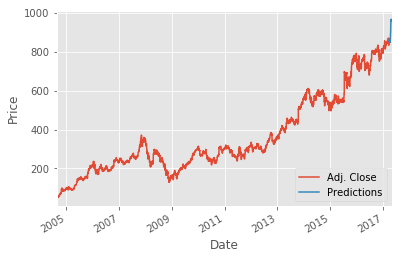

In [15]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Predictions'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for p in predictions:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [p]
    
    
df['Adj. Close'].plot()
df['Predictions'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()